# Final Exam 
#### Rezoon Rasheed


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Exploratory Analysis

#### Exploring the dataset and cleaning the data.

In [5]:
# Load the dataset
file_path = 'https://www.dropbox.com/scl/fi/9tv69dtq3o2q194xp60m7/world-education-data.csv?rlkey=zbf8l3lahf3p6i2ij871ntyax&dl=1'  
df = pd.read_csv(file_path)

# Overview of the dataset
overview = {
    "Shape": df.shape,
    "Columns": df.columns.tolist(),
    "Missing Values": df.isnull().sum(),
    "Data Types": df.dtypes,
}

# Print the overview
print("Dataset Overview:")
for key, value in overview.items():
    print(f"{key}:\n{value}\n")

# Cleaning the dataset
# Step 1: Remove duplicates
df = df.drop_duplicates()

# Step 2: Fill missing values
numeric_columns = [
    "gov_exp_pct_gdp",
    "lit_rate_adult_pct",
    "pri_comp_rate_pct",
    "pupil_teacher_primary",
    "pupil_teacher_secondary",
    "school_enrol_primary_pct",
    "school_enrol_secondary_pct",
    "school_enrol_tertiary_pct",
]

for col in numeric_columns:
    df[col] = df.groupby("country_code")[col].transform(lambda x: x.fillna(x.median()))
    if df[col].isnull().any():  # Fill remaining with global median
        df[col] = df[col].fillna(df[col].median())

# Step 3: Cap outliers
df["school_enrol_primary_pct"] = df["school_enrol_primary_pct"].clip(upper=100)
df["school_enrol_secondary_pct"] = df["school_enrol_secondary_pct"].clip(upper=100)
df["school_enrol_tertiary_pct"] = df["school_enrol_tertiary_pct"].clip(upper=150)

# Verify cleaning steps
cleaned_summary = {
    "Missing Values After Cleaning": df.isnull().sum(),
    "Outliers Capped in Enrollment": {
        "Primary": (df["school_enrol_primary_pct"] > 100).sum(),
        "Secondary": (df["school_enrol_secondary_pct"] > 100).sum(),
        "Tertiary": (df["school_enrol_tertiary_pct"] > 150).sum(),
    },
}

# Print the cleaning summary
print("\nData Cleaning Summary:")
for key, value in cleaned_summary.items():
    print(f"{key}:\n{value}\n")


Dataset Overview:
Shape:
(5892, 11)

Columns:
['country', 'country_code', 'year', 'gov_exp_pct_gdp', 'lit_rate_adult_pct', 'pri_comp_rate_pct', 'pupil_teacher_primary', 'pupil_teacher_secondary', 'school_enrol_primary_pct', 'school_enrol_secondary_pct', 'school_enrol_tertiary_pct']

Missing Values:
country                          0
country_code                     0
year                             0
gov_exp_pct_gdp               1393
lit_rate_adult_pct            4015
pri_comp_rate_pct             1452
pupil_teacher_primary         2216
pupil_teacher_secondary       2875
school_enrol_primary_pct       540
school_enrol_secondary_pct    1147
school_enrol_tertiary_pct     1500
dtype: int64

Data Types:
country                        object
country_code                   object
year                            int64
gov_exp_pct_gdp               float64
lit_rate_adult_pct            float64
pri_comp_rate_pct             float64
pupil_teacher_primary         float64
pupil_teacher_secondary

### Dataset Overview:

#### Shape:
   The dataset contains 5,892 rows and 11 columns, representing global education data.
#### Columns:
   Key indicators include government expenditure on education, literacy rates, completion rates, pupil-teacher ratios, and school enrollment rates at various levels.
#### Missing Values:
Significant missing data in some columns, e.g., lit_rate_adult_pct (68%), gov_exp_pct_gdp (24%), and pupil_teacher_primary (37%).
Other columns like enrollment rates have fewer missing values (9%-25%).
#### Data Types:
Categorical columns (country, country_code) and numeric indicators stored as floats.

### Data Cleaning Summary:

#### Missing Values:
All missing values have been successfully filled:
- Country-specific medians were used wherever possible.
- Global medians were used as a fallback.

#### Outliers:
Enrollment rates exceeding realistic thresholds (e.g., over 100% for primary/secondary levels) were capped:
- Primary: Capped at 100%.
- Secondary: Capped at 100%.
- Tertiary: Capped at 150%.
No excessive outliers remain after capping.

### Final Result:
The dataset is now fully clean, with no missing values or unrealistic outliers.

#### Providing an overview of global trends. 

In [8]:
# Calculate global trends based on key indicators
global_trends = {
    "Government Expenditure on Education (% of GDP)": {
        "Mean": df["gov_exp_pct_gdp"].mean(),
        "Median": df["gov_exp_pct_gdp"].median(),
        "Min": df["gov_exp_pct_gdp"].min(),
        "Max": df["gov_exp_pct_gdp"].max(),
    },
    "Literacy Rate (Adult Total)": {
        "Mean": df["lit_rate_adult_pct"].mean(),
        "Median": df["lit_rate_adult_pct"].median(),
        "Min": df["lit_rate_adult_pct"].min(),
        "Max": df["lit_rate_adult_pct"].max(),
    },
    "Primary Completion Rate (%)": {
        "Mean": df["pri_comp_rate_pct"].mean(),
        "Median": df["pri_comp_rate_pct"].median(),
        "Min": df["pri_comp_rate_pct"].min(),
        "Max": df["pri_comp_rate_pct"].max(),
    },
    "Pupil-Teacher Ratio (Primary)": {
        "Mean": df["pupil_teacher_primary"].mean(),
        "Median": df["pupil_teacher_primary"].median(),
        "Min": df["pupil_teacher_primary"].min(),
        "Max": df["pupil_teacher_primary"].max(),
    },
    "Pupil-Teacher Ratio (Secondary)": {
        "Mean": df["pupil_teacher_secondary"].mean(),
        "Median": df["pupil_teacher_secondary"].median(),
        "Min": df["pupil_teacher_secondary"].min(),
        "Max": df["pupil_teacher_secondary"].max(),
    },
    "School Enrollment Rates (Primary)": {
        "Mean": df["school_enrol_primary_pct"].mean(),
        "Median": df["school_enrol_primary_pct"].median(),
        "Min": df["school_enrol_primary_pct"].min(),
        "Max": df["school_enrol_primary_pct"].max(),
    },
    "School Enrollment Rates (Secondary)": {
        "Mean": df["school_enrol_secondary_pct"].mean(),
        "Median": df["school_enrol_secondary_pct"].median(),
        "Min": df["school_enrol_secondary_pct"].min(),
        "Max": df["school_enrol_secondary_pct"].max(),
    },
    "School Enrollment Rates (Tertiary)": {
        "Mean": df["school_enrol_tertiary_pct"].mean(),
        "Median": df["school_enrol_tertiary_pct"].median(),
        "Min": df["school_enrol_tertiary_pct"].min(),
        "Max": df["school_enrol_tertiary_pct"].max(),
    },
}

# Convert trends into a DataFrame for a better display
trends_df = pd.DataFrame(global_trends).T

# Display the trends DataFrame
print("Global Trends Overview:")
print(trends_df)


Global Trends Overview:
                                                     Mean      Median  \
Government Expenditure on Education (% of GDP)   4.322504    4.079830   
Literacy Rate (Adult Total)                     83.231074   89.528484   
Primary Completion Rate (%)                     87.823558   94.497276   
Pupil-Teacher Ratio (Primary)                   25.107154   21.577545   
Pupil-Teacher Ratio (Secondary)                 17.764952   16.543200   
School Enrollment Rates (Primary)               96.488736  100.000000   
School Enrollment Rates (Secondary)             74.724889   84.004730   
School Enrollment Rates (Tertiary)              34.202823   27.198030   

                                                      Min         Max  
Government Expenditure on Education (% of GDP)   0.242600   15.863470  
Literacy Rate (Adult Total)                     14.000000  100.000000  
Primary Completion Rate (%)                     14.411250  156.167175  
Pupil-Teacher Ratio (Primary) 

### Explanation of Global Trends:

#### Government Expenditure on Education:

- Mean: 4.32% of GDP, Median: 4.08%.
- Range: From as low as 0.24% to a high of 15.86%.
  
#### Literacy Rate (Adult Total):

- Mean: 83.23%, Median: 89.53%.
- Wide disparity: Lowest at 14%, highest at 100%.
  
#### Primary Completion Rate:

- Mean: 87.82%, Median: 94.50%.
- Outliers evident with a range of 14.41% to 156.17% (indicating over-aged or repeating students).

#### Pupil-Teacher Ratio:

- Primary: Mean: 25.11, Median: 21.58, ranging from 5.36 to 100.24.
- Secondary: Mean: 17.76, Median: 16.54, ranging from 4.98 to 80.05.

#### School Enrollment Rates:

- Primary: Near universal enrollment, with a median of 100% and a mean of 96.49%.
- Secondary: Median: 84.00%, Mean: 74.72%, indicating lower enrollment compared to primary levels.
- Tertiary: Mean: 34.20%, Median: 27.20%, showing significantly lower participation, with values ranging from 0.12% to 150%.

#### Overall Observation:

- Strong primary education indicators, but gaps in secondary and tertiary levels.
- Pupil-teacher ratios vary widely, reflecting differences in resource allocation.
- Government expenditure varies greatly, impacting education outcomes.

## 2.  Comparing the Education data of United States, India and China. 

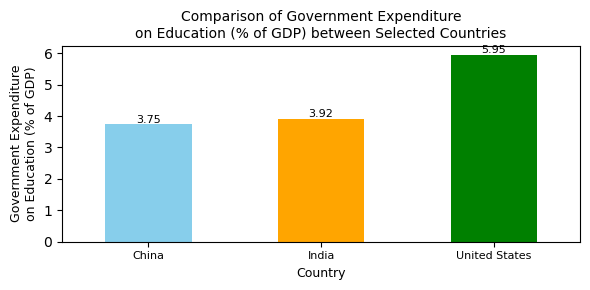

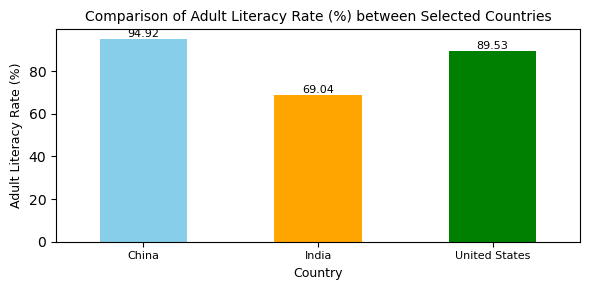

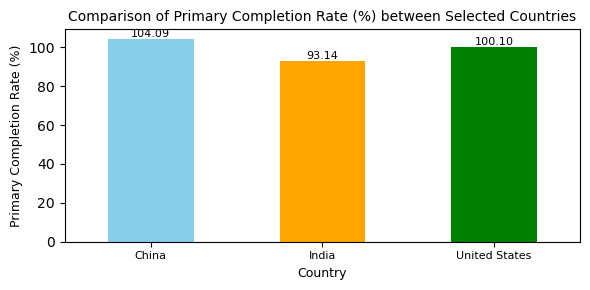

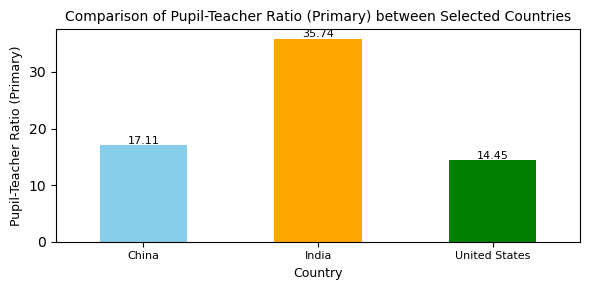

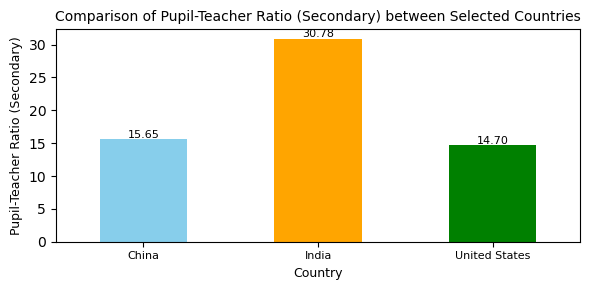

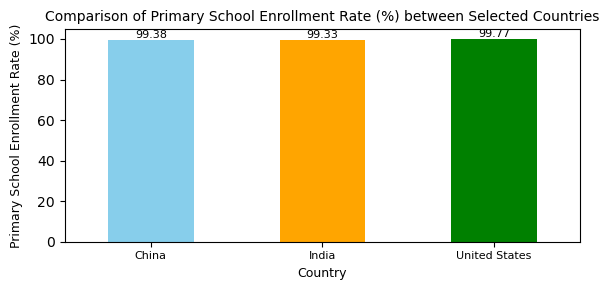

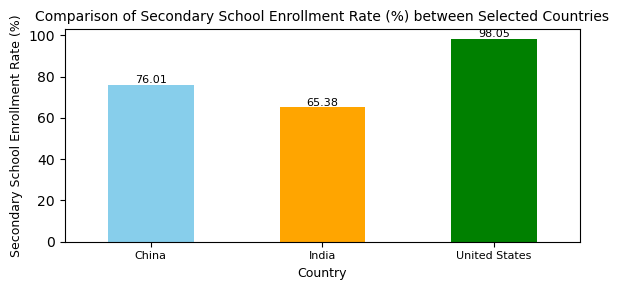

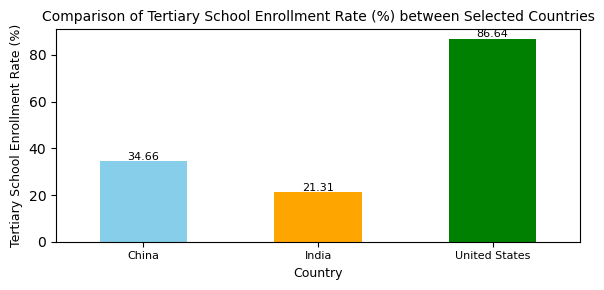

In [11]:
# Define the countries to compare
countries_to_compare = ["United States", "India", "China"]

# Filter the data for the selected countries
comparison_df = df[df["country"].isin(countries_to_compare)]

# Aggregate the data by country to compute mean values for key indicators
comparison_summary = comparison_df.groupby("country")[[
    "gov_exp_pct_gdp",
    "lit_rate_adult_pct",
    "pri_comp_rate_pct",
    "pupil_teacher_primary",
    "pupil_teacher_secondary",
    "school_enrol_primary_pct",
    "school_enrol_secondary_pct",
    "school_enrol_tertiary_pct",
]].mean()

# Indicator labels for y-axis and titles
indicator_labels = {
    "gov_exp_pct_gdp": "Government Expenditure\non Education (% of GDP)",  # Split into two lines
    "lit_rate_adult_pct": "Adult Literacy Rate (%)",
    "pri_comp_rate_pct": "Primary Completion Rate (%)",
    "pupil_teacher_primary": "Pupil-Teacher Ratio (Primary)",
    "pupil_teacher_secondary": "Pupil-Teacher Ratio (Secondary)",
    "school_enrol_primary_pct": "Primary School Enrollment Rate (%)",
    "school_enrol_secondary_pct": "Secondary School Enrollment Rate (%)",
    "school_enrol_tertiary_pct": "Tertiary School Enrollment Rate (%)"
}

# Create bar plots for each indicator with adjusted font sizes and labels
for column in comparison_summary.columns:
    ax = comparison_summary[column].plot(kind='bar', figsize=(6, 3), color=['skyblue', 'orange', 'green'])
    plt.title(f"Comparison of {indicator_labels[column]} between Selected Countries", fontsize=10)
    plt.ylabel(indicator_labels[column], fontsize=9)
    plt.xlabel("Country", fontsize=9)
    plt.xticks(rotation=0, fontsize=8)

    # Annotate exact values on the bars
    for i, value in enumerate(comparison_summary[column]):
        plt.text(i, value + (0.01 * value), f"{value:.2f}", ha='center', fontsize=8)

    plt.tight_layout()
    plt.show()





### Insights and Explanation of the Graphs:

#### Government Expenditure on Education:
- Countries with higher government spending (e.g., the United States) generally allocate more resources to education, potentially leading to better infrastructure and learning outcomes.
- Developing countries like India and China spend a lower percentage of GDP, reflecting budget constraints or competing priorities.

#### Literacy Rate (Adult Total):
- The United States leads with near-universal literacy rates, while India lags behind, showing the need for greater emphasis on adult education programs.
- China’s relatively high literacy rate highlights the success of its widespread educational reforms.

#### Primary Completion Rate:
- High completion rates in the United States suggest an efficient primary education system.
- India and China, while improving, show some gaps that could be addressed with better policies or resource allocation.

#### Pupil-Teacher Ratios:
- India has notably higher pupil-teacher ratios compared to the United States and China, indicating teacher shortages or overburdened systems.
- Lower ratios in the United States reflect better access to teachers, potentially leading to improved student performance.

#### School Enrollment Rates:
- **Primary**: All countries show strong enrollment rates, with near-universal participation.
- **Secondary**: The United States and China exhibit significantly higher secondary enrollment than India, where affordability and social factors might play a role.
- **Tertiary**: A stark contrast is evident, with the United States far ahead in higher education enrollment, reflecting greater access and opportunities for advanced education.

#### Annotations and Values:
- Exact values provide quantitative clarity, helping to pinpoint precise differences between countries.
- India’s tertiary enrollment, for instance, is much lower compared to the United States, underscoring the need for policies encouraging higher education.

### Key Insights:
1. **Resource Allocation Matters**: Higher spending and better pupil-teacher ratios correlate with improved literacy and higher enrollment rates.
2. **Developing vs. Developed Nations**: Significant gaps exist between developing countries (India, China) and developed countries (United States) in terms of access, quality, and outcomes.
3. **Tertiary Education Access**: The largest disparities are seen in tertiary enrollment, emphasizing the importance of investments in higher education infrastructure 


## 3. Analyzing Impact of Education Spending and Policies on Literacy, Enrollment, and Outcomes

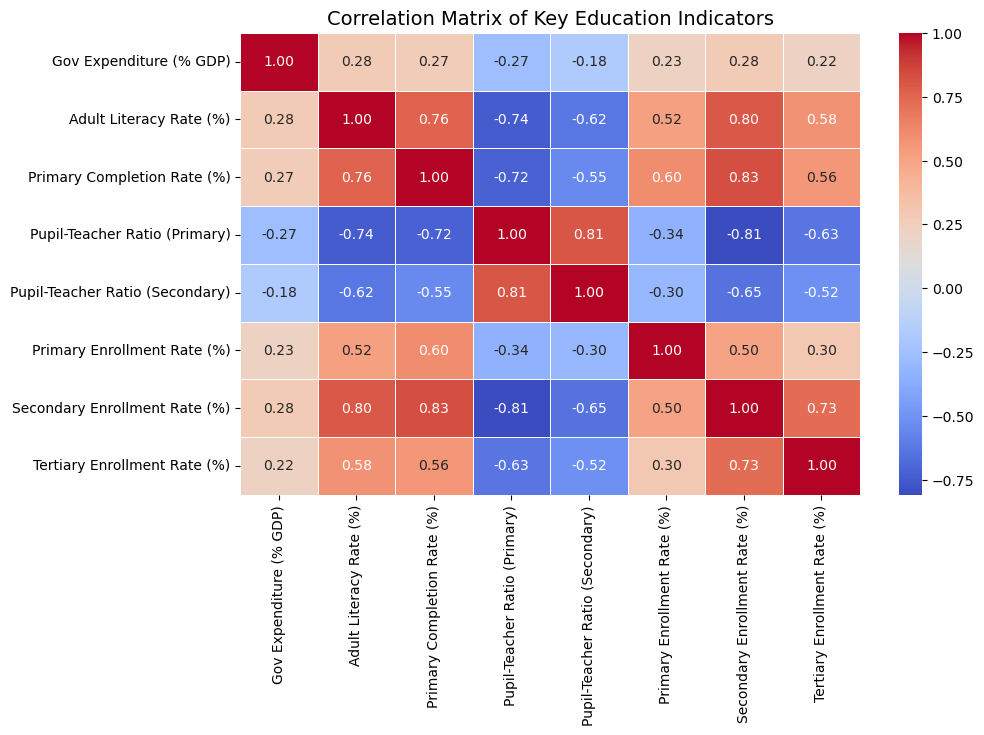

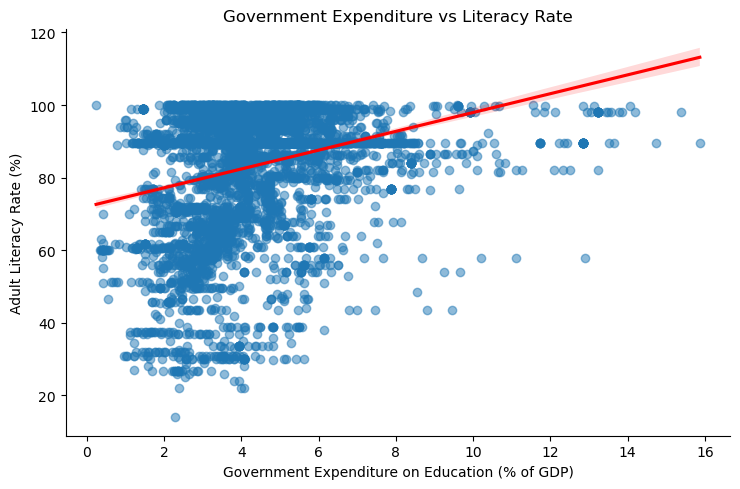

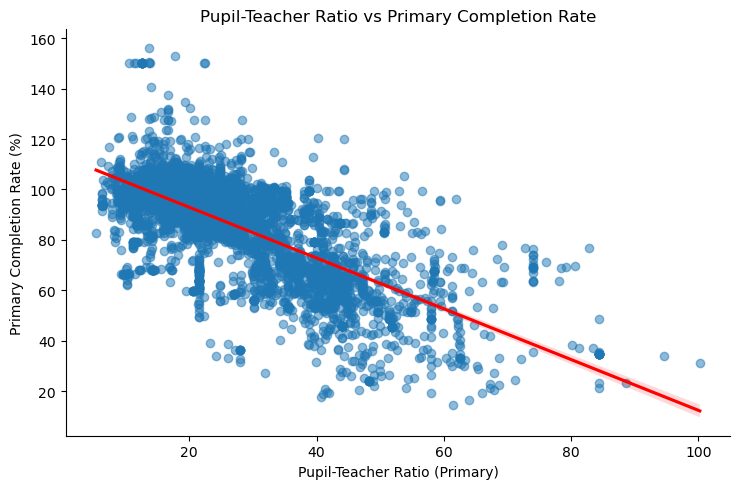

In [14]:
# Focus on key variables for the analysis
analysis_df = df[[
    "gov_exp_pct_gdp",
    "lit_rate_adult_pct",
    "pri_comp_rate_pct",
    "pupil_teacher_primary",
    "pupil_teacher_secondary",
    "school_enrol_primary_pct",
    "school_enrol_secondary_pct",
    "school_enrol_tertiary_pct"
]]

# Create meaningful labels for the heatmap
heatmap_labels = [
    "Gov Expenditure (% GDP)", 
    "Adult Literacy Rate (%)",
    "Primary Completion Rate (%)",
    "Pupil-Teacher Ratio (Primary)",
    "Pupil-Teacher Ratio (Secondary)",
    "Primary Enrollment Rate (%)",
    "Secondary Enrollment Rate (%)",
    "Tertiary Enrollment Rate (%)"
]

# Compute correlation matrix to examine relationships
correlation_matrix = analysis_df.corr()

# Display the correlation matrix as a heatmap with meaningful labels
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5,
    xticklabels=heatmap_labels,
    yticklabels=heatmap_labels
)
plt.title("Correlation Matrix of Key Education Indicators", fontsize=14)
plt.show()

# Plot relationships between key variables
# Government spending vs Literacy
sns.lmplot(
    data=df,
    x="gov_exp_pct_gdp",
    y="lit_rate_adult_pct",
    aspect=1.5,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title("Government Expenditure vs Literacy Rate")
plt.xlabel("Government Expenditure on Education (% of GDP)")
plt.ylabel("Adult Literacy Rate (%)")
plt.tight_layout()
plt.show()

# Pupil-Teacher Ratio vs Primary Completion Rate
sns.lmplot(
    data=df,
    x="pupil_teacher_primary",
    y="pri_comp_rate_pct",
    aspect=1.5,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title("Pupil-Teacher Ratio vs Primary Completion Rate")
plt.xlabel("Pupil-Teacher Ratio (Primary)")
plt.ylabel("Primary Completion Rate (%)")
plt.tight_layout()
plt.show()


### Analysis of Education Spending and Policies on Outcomes

#### Correlation Matrix:
- **Purpose**: Shows the relationships between key education indicators, such as government expenditure, pupil-teacher ratios, literacy rates, and enrollment rates.
- **Key Observations**:
  - **Government Expenditure**:
    - Positively correlated with literacy rates and enrollment rates, suggesting that higher spending improves education outcomes.
  - **Pupil-Teacher Ratio**:
    - Negatively correlated with primary completion rates, indicating that smaller class sizes lead to better outcomes.
  - **Tertiary Enrollment**:
    - Strong correlation with government expenditure, emphasizing the role of funding in advanced education.

#### Government Expenditure vs Literacy Rate:
- **Purpose**: Examines the impact of government spending on adult literacy.
- **Graph Insights**:
  - A positive trend suggests that countries investing a higher percentage of GDP in education tend to have higher literacy rates.
  - Outliers (low literacy despite moderate spending) may reflect systemic inefficiencies or socio-economic challenges.

#### Pupil-Teacher Ratio vs Primary Completion Rate:
- **Purpose**: Analyzes how classroom size affects primary education completion.
- **Graph Insights**:
  - A clear negative trend shows that lower pupil-teacher ratios are associated with higher primary completion rates.
  - High ratios, often seen in developing countries, indicate resource constraints impacting educational outcomes.

### Key Insights:
1. **Resource Allocation**:
   - Higher government expenditure positively influences literacy and enrollment rates, demonstrating the importance of funding in achieving better outcomes.
2. **Classroom Size Matters**:
   - Smaller pupil-teacher ratios lead to higher completion rates, highlighting the need for adequate teacher recruitment and training.
3. **Tertiary Education**:
   - Funding plays a crucial role in promoting higher education participation, with strong correlations observed between expenditure and tertiary enrollment rates.
4. **Policy Implications**:
   - Developing nations should focus on reducing pupil-teacher ratios and increasing funding to bridge gaps in literacy and enrollment rates.

This analysis highlights the critical role of government policies and resource allocation in shaping educational outcomes, offering actionable insights for policymakers.


## 4. Assessing whether some countries were more affected by COVID-19 than Others.

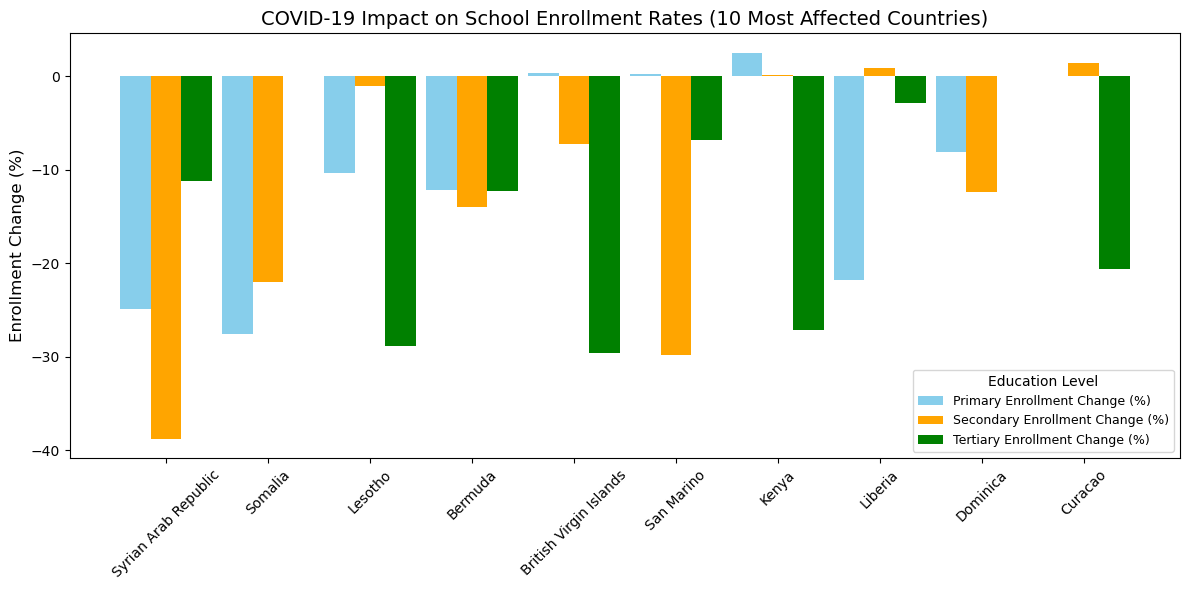

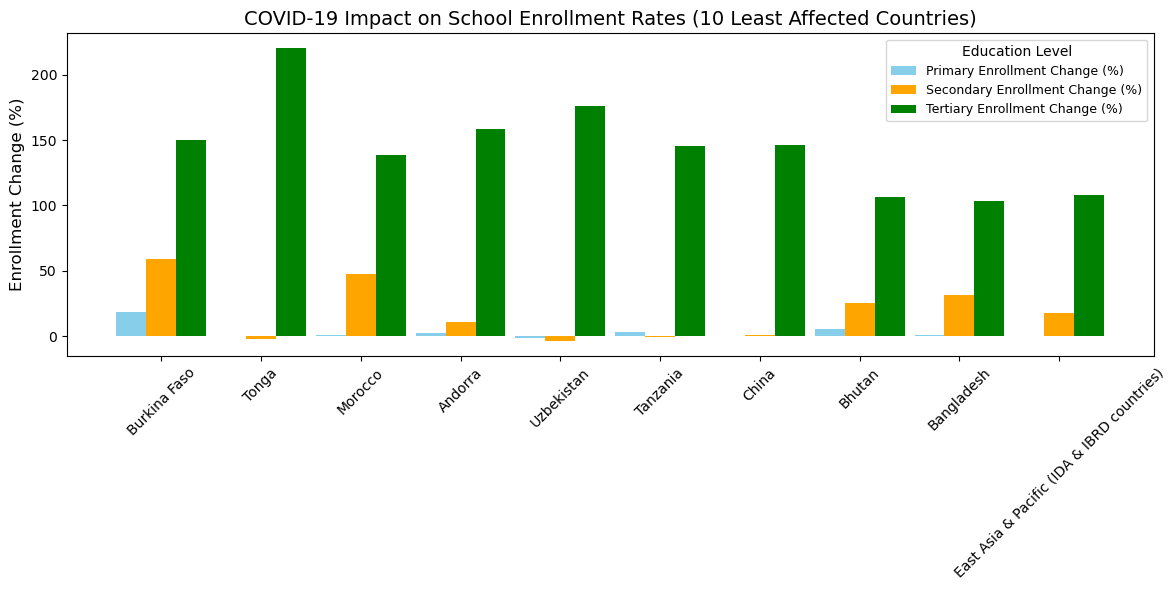

In [17]:
# Create subsets for pre-COVID (before 2020) and post-COVID (2020 and after)
df_pre_covid = df[df["year"] < 2020].groupby("country")[[
    "school_enrol_primary_pct",
    "school_enrol_secondary_pct",
    "school_enrol_tertiary_pct",
]].mean()

df_post_covid = df[df["year"] >= 2020].groupby("country")[[
    "school_enrol_primary_pct",
    "school_enrol_secondary_pct",
    "school_enrol_tertiary_pct",
]].mean()

# Combine pre- and post-COVID data into a single DataFrame
covid_comparison = pd.DataFrame({
    "Primary Enrollment (Pre-COVID)": df_pre_covid["school_enrol_primary_pct"],
    "Primary Enrollment (Post-COVID)": df_post_covid["school_enrol_primary_pct"],
    "Secondary Enrollment (Pre-COVID)": df_pre_covid["school_enrol_secondary_pct"],
    "Secondary Enrollment (Post-COVID)": df_post_covid["school_enrol_secondary_pct"],
    "Tertiary Enrollment (Pre-COVID)": df_pre_covid["school_enrol_tertiary_pct"],
    "Tertiary Enrollment (Post-COVID)": df_post_covid["school_enrol_tertiary_pct"]
}).dropna()

# Calculate percentage change in enrollment for all countries
covid_comparison["Primary Enrollment Change (%)"] = (
    (covid_comparison["Primary Enrollment (Post-COVID)"] - covid_comparison["Primary Enrollment (Pre-COVID)"]) /
    covid_comparison["Primary Enrollment (Pre-COVID)"]
) * 100

covid_comparison["Secondary Enrollment Change (%)"] = (
    (covid_comparison["Secondary Enrollment (Post-COVID)"] - covid_comparison["Secondary Enrollment (Pre-COVID)"]) /
    covid_comparison["Secondary Enrollment (Pre-COVID)"]
) * 100

covid_comparison["Tertiary Enrollment Change (%)"] = (
    (covid_comparison["Tertiary Enrollment (Post-COVID)"] - covid_comparison["Tertiary Enrollment (Pre-COVID)"]) /
    covid_comparison["Tertiary Enrollment (Pre-COVID)"]
) * 100

# Compute the overall impact for each country by averaging changes across all education levels
covid_comparison["Overall Enrollment Change (%)"] = covid_comparison[
    ["Primary Enrollment Change (%)", "Secondary Enrollment Change (%)", "Tertiary Enrollment Change (%)"]
].mean(axis=1)

# Identify the 10 most and least affected countries
most_affected = covid_comparison.sort_values(by="Overall Enrollment Change (%)").head(10)
least_affected = covid_comparison.sort_values(by="Overall Enrollment Change (%)", ascending=False).head(10)

# Plot for most affected countries with adjusted legend position and size
fig, ax1 = plt.subplots(figsize=(12, 6))
bars = np.arange(len(most_affected))
width = 0.3

ax1.bar(
    bars - width, 
    most_affected["Primary Enrollment Change (%)"], 
    width, 
    label="Primary Enrollment Change (%)", 
    color="skyblue"
)
ax1.bar(
    bars, 
    most_affected["Secondary Enrollment Change (%)"], 
    width, 
    label="Secondary Enrollment Change (%)", 
    color="orange"
)
ax1.bar(
    bars + width, 
    most_affected["Tertiary Enrollment Change (%)"], 
    width, 
    label="Tertiary Enrollment Change (%)", 
    color="green"
)

# Customize the first plot
ax1.set_title("COVID-19 Impact on School Enrollment Rates (10 Most Affected Countries)", fontsize=14)
ax1.set_ylabel("Enrollment Change (%)", fontsize=12)
ax1.set_xticks(bars)
ax1.set_xticklabels(most_affected.index, rotation=45, fontsize=10)
ax1.legend(loc="lower right", title="Education Level", fontsize=9)  # Adjust legend position to bottom-right

plt.tight_layout()
plt.show()

# Plot for least affected countries with legend on the top-right
fig, ax2 = plt.subplots(figsize=(12, 6))
bars = np.arange(len(least_affected))

ax2.bar(
    bars - width, 
    least_affected["Primary Enrollment Change (%)"], 
    width, 
    label="Primary Enrollment Change (%)", 
    color="skyblue"
)
ax2.bar(
    bars, 
    least_affected["Secondary Enrollment Change (%)"], 
    width, 
    label="Secondary Enrollment Change (%)", 
    color="orange"
)
ax2.bar(
    bars + width, 
    least_affected["Tertiary Enrollment Change (%)"], 
    width, 
    label="Tertiary Enrollment Change (%)", 
    color="green"
)

# Customize the second plot
ax2.set_title("COVID-19 Impact on School Enrollment Rates (10 Least Affected Countries)", fontsize=14)
ax2.set_ylabel("Enrollment Change (%)", fontsize=12)
ax2.set_xticks(bars)
ax2.set_xticklabels(least_affected.index, rotation=45, fontsize=10)
ax2.legend(loc="upper right", title="Education Level", fontsize=9)  # Adjust legend position to top-right

plt.tight_layout()
plt.show()


### Assessment of COVID-19's Impact on School Enrollment Rates

#### Key Findings:
1. **Most Affected Countries**:
   - Countries such as Syrian Arab Republic, Somalia, and Lesotho experienced significant declines across all enrollment levels (primary, secondary, tertiary).
   - **Primary Enrollment**: There were declines, indicating widespread disruptions in basic education.
   - **Secondary Enrollment**: Sharp reductions were visible, reflecting challenges in maintaining continuity for older students.
   - **Tertiary Enrollment**: The highest declines were among most affected countries, possibly due to economic pressures and limited remote learning infrastructure.

2. **Least Affected Countries**:
   - Countries such as China, Morocco, and burkina faso showed minimal declines or even slight increases in enrollment rates.
   - These countries likely benefited from:
     - Strong pre-existing remote learning infrastructure.
     - Proactive government policies to sustain education during lockdowns.

#### Observations:
1. **Developing vs. Developed Countries**:
   - Developing countries were disproportionately affected due to limited access to technology, fewer resources for online learning, and higher dropout rates.
   - Developed countries adapted better with advanced remote learning systems and robust government support.

2. **Education Level Disparities**:
   - Primary education faced moderate declines, as younger students were prioritized for reopening schools.
   - Secondary and tertiary levels saw larger impacts, likely due to reduced accessibility and economic constraints.

#### Policy Implications:
1. **Bridging the Digital Divide**:
   - Investment in technology is crucial to ensure equitable access to education during disruptions.
2. **Focused Recovery Programs**:
   - Policies targeting tertiary education, such as financial aid and support for online learning, can help mitigate long-term impacts.
3. **Strengthening Education Resilience**:
   - Developing robust hybrid models for education can reduce dependency on physical classrooms during future crises.

#### Conclusion:
The data clearly shows that while some countries managed to sustain education systems effectively, others faced severe disruptions, particularly in secondary and tertiary levels. Proactive policy measures and investment in technology are key to mitigating future crises.


## 5. How do education indicators differ between low-income and high-income countries? 

              gov_exp_pct_gdp  lit_rate_adult_pct  pri_comp_rate_pct  \
income_group                                                           
High-Income          4.648772           89.528484         102.024174   
Low-Income           3.739428           68.299560          82.885305   

              pupil_teacher_primary  school_enrol_primary_pct  \
income_group                                                    
High-Income               14.682193                 99.922306   
Low-Income                38.265603                 90.284945   

              school_enrol_secondary_pct  school_enrol_tertiary_pct  
income_group                                                         
High-Income                    99.325786                  72.607635  
Low-Income                     48.000770                  11.267664  


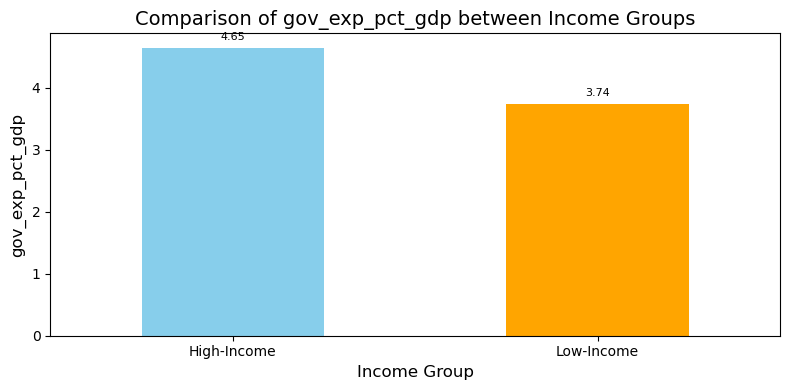

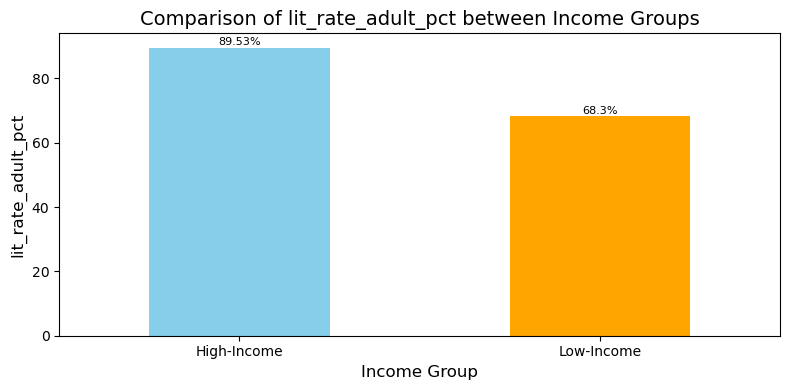

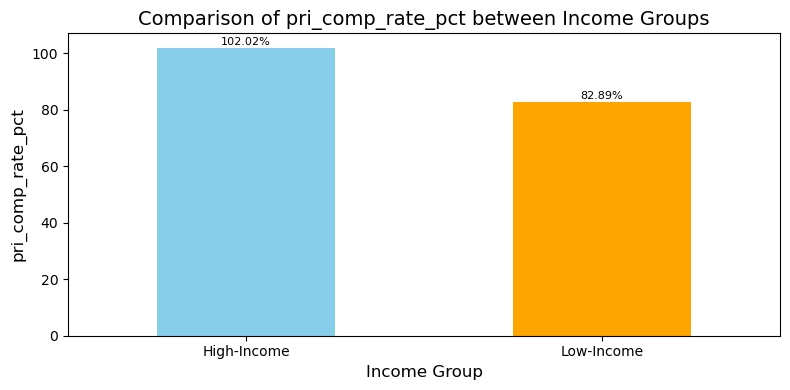

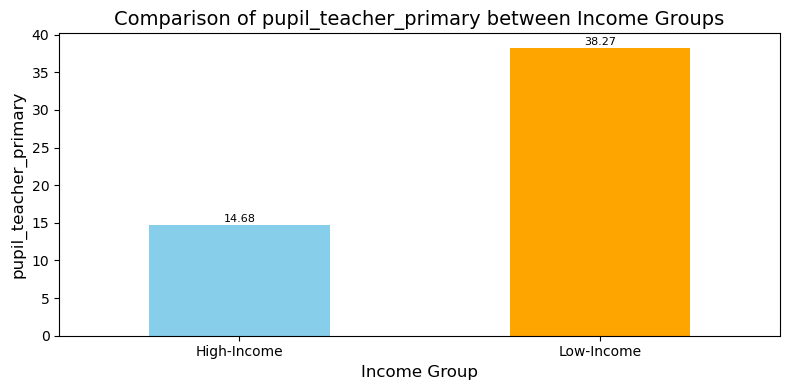

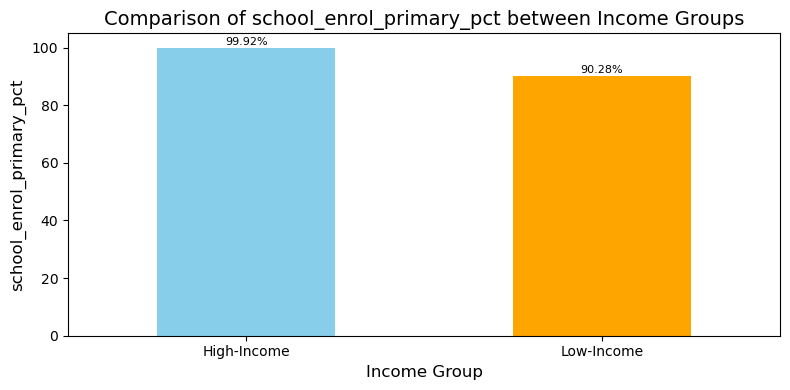

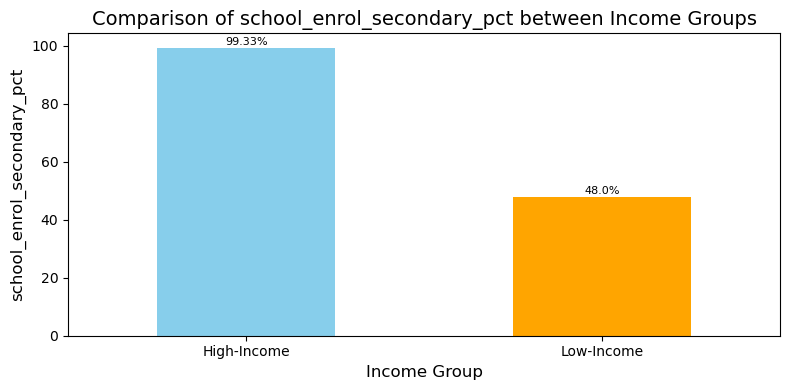

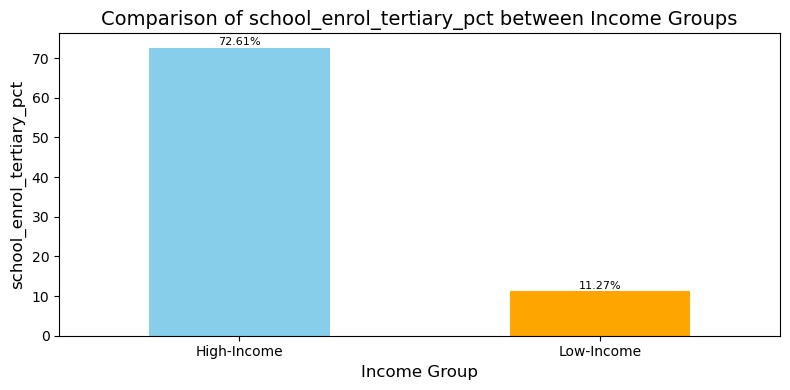

In [20]:
df['income_group'] = df['country'].map({
    "India": "Low-Income", "Pakistan": "Low-Income", "Kenya": "Low-Income",
    "United States": "High-Income", "Germany": "High-Income", "Japan": "High-Income"
})

# Calculate mean values for education indicators grouped by income group
income_group_summary = df.groupby('income_group')[[
    "gov_exp_pct_gdp",
    "lit_rate_adult_pct",
    "pri_comp_rate_pct",
    "pupil_teacher_primary",
    "school_enrol_primary_pct",
    "school_enrol_secondary_pct",
    "school_enrol_tertiary_pct"
]].mean()

# Display summary for comparison
print(income_group_summary)

# Visualize the differences in education indicators
for column in income_group_summary.columns:
    ax = income_group_summary[column].plot(kind='bar', figsize=(8, 4), color=['skyblue', 'orange'])
    ax.set_title(f"Comparison of {column} between Income Groups", fontsize=14)
    ax.set_ylabel(column, fontsize=12)
    ax.set_xlabel("Income Group", fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
    
    # Format the labels to show meaningful values (e.g., rounding and adding percentage symbol)
    formatted_labels = [f"{round(value, 2)}%" if column.endswith('pct') else round(value, 2) for value in income_group_summary[column]]
    
    # Add the formatted labels on the bars
    for label, rect in zip(formatted_labels, ax.containers[0]):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 0.1, label, ha='center', va='bottom', fontsize=8
        )

    plt.tight_layout()
    plt.show()



### Comparison of Education Indicators between Low-Income and High-Income Countries

#### Key Findings:
1. **Government Expenditure on Education (% of GDP)**:
   - High-income countries (e.g., United States, Germany, Japan) tend to allocate a higher percentage of GDP to education. The mean for high-income countries is approximately **4.65%**, while low-income countries (e.g., India, Pakistan, Kenya) allocate about **3.74%**.
   - This reflects the larger government budgets available in high-income countries for education.

2. **Literacy Rate (Adult Total)**:
   - High-income countries show a significantly higher average literacy rate (**89.53%**) compared to low-income countries (**68.3%**). This indicates a gap in adult education and literacy between the two groups, with low-income countries facing challenges in literacy rates due to limited educational resources.

3. **Primary Completion Rate (%)**:
   - High-income countries exhibit near-universal primary school completion rates, with an average of **102.02%**, while low-income countries show more variation, with the mean at **82.89%**.
   - The disparity highlights issues in access to education, particularly in rural and underserved areas in low-income countries.

4. **Pupil-Teacher Ratio (Primary)**:
   - High-income countries generally have a lower pupil-teacher ratio, averaging **14.68**, indicating better access to quality education and smaller class sizes. Low-income countries, on the other hand, have a higher ratio, averaging **38.27**, which can result in less effective learning environments and teacher-student interaction.

5. **School Enrollment Rates**:
   - **Primary Enrollment**: High-income countries exhibit near-universal primary school enrollment (**99.92%**) compared to low-income countries (**90.28%**). This disparity reflects differences in school accessibility and affordability.
   - **Secondary Enrollment**: High-income countries have higher secondary school enrollment rates (**99.33%**) than low-income countries (**48.0%**), where affordability, societal factors, and infrastructure often hinder secondary education access.
   - **Tertiary Enrollment**: Tertiary enrollment rates are significantly higher in high-income countries, with an average of **72.61%**, compared to much lower rates in low-income countries (**11.27%**). This indicates that access to higher education is still a significant challenge in low-income countries.

#### Observations:
1. **Resource Allocation**:
   - High-income countries allocate more resources to education, which is reflected in higher literacy rates, better pupil-teacher ratios, and higher enrollment rates across all education levels.
2. **Access to Education**:
   - Low-income countries face significant barriers in achieving universal education. Issues such as limited infrastructure, fewer qualified teachers, and financial constraints contribute to lower enrollment and completion rates.

#### Policy Implications:
1. **Investment in Education**:
   - Low-income countries need to increase government spending on education to bridge the gap in literacy rates and enrollment.
2. **Improving Infrastructure**:
   - Investment in educational infrastructure, especially in rural and underserved regions, can help improve access to primary and secondary education.
3. **Teacher Training and Recruitment**:
   - Reducing pupil-teacher ratios in low-income countries through better teacher recruitment and training programs can enhance educational quality and outcomes.

#### Conclusion:
The analysis demonstrates that there is a significant disparity between low-income and high-income countries regarding key education indicators. High-income countries benefit from better funding, infrastructure, and access to education, while low-income countries face multiple barriers to achieving universal education. Addressing these disparities requires targeted investments in infrastructure, teacher training, and financial support for education in low-income countries.
